In [24]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pickle
import glob
from tqdm.auto import tqdm
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
model = pickle.load(open("dogs_cats_classification_model.pkl","rb"))

Using TensorFlow backend.


In [4]:
cwd = os.getcwd()
print("The current working directory is {}".format(cwd))

The current working directory is E:\Study\Image Classification\Dogs_and_Cats


In [8]:
test_data_path = os.path.join(cwd,"dataset/test_set")

In [29]:
categories = ["cats","dogs"]

IMG_SIZE = 80
test_images = []
for category in tqdm(categories,total=len(categories)):
    file_path = os.path.join(test_data_path,category+"/"+category[0:3])
    files = glob.glob(file_path+"*.jpg")
    for file in tqdm(files,total=len(files)):
        img_array = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img_array,dsize=(IMG_SIZE,IMG_SIZE))
        img = img/255.0
        test_images.append(img)
test_img = np.array(test_images)

In [30]:
test_img_sub = test_img[np.random.choice(len(test_img),10)]

In [31]:
test_img_sub_arr = np.array(test_img_sub).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [15]:
#X_test_sub = X_test[np.random.choice(len(X_test),10)]

In [32]:
test_img_sub_arr.shape

(10, 80, 80, 1)

In [33]:
prediction = model.predict(test_img_sub_arr)

In [34]:
predicted_val = [int(round(p[0])) for p in prediction]

In [35]:
predicted_val

[0, 0, 0, 1, 1, 1, 1, 1, 1, 0]

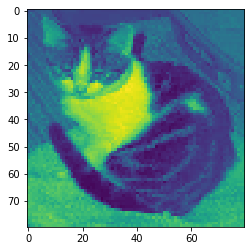

In [36]:
plt.imshow(test_img_sub[0])
plt.show()

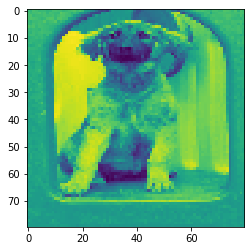

In [42]:
plt.imshow(test_img_sub[8])
plt.show()